# Importing Python Packages

In [1]:
import openpyxl
import xlrd
import os
import glob

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

In [2]:
# import python packages

# import nltk (natural language tool kit)
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import requests
from lxml import html
import csv
import pandas as pd

from os import path

import matplotlib.pyplot as plt
%matplotlib inline


#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))


# Importing Data

## Opening the Correct Directory

In [3]:
os.chdir('C:\\Users\\millsj.ADMIN\\Desktop\\GENBA 894\\2018_DataChallenges_Teradata\\Events\\')

In [4]:
# filenames
excel_names = ["2013-2017 Bike Events.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
events = pd.concat(frames)

# Check headers
events.head(3)

,Fiscal Year,Event ID,Security Category Name,Public Event Name,Event Created Date,Event Date,Event Goal($),Active Registrations,Inactive Registrations,Total Fees Paid,...,Total Not From Participant($),Total Team Gifts($),Total Event Gifts($),Total Offline Unconfirmed Gifts($),Street Address,City,State,Zip Code,Internal Event Name,Previous Event ID
0,2014,22598,TXH Bike Events,"Texas, Houston - 2014 BP MS 150",2013-08-15 16:01:00,2014-04-12 16:41:00,18500000,14871,1063,1584950.0,...,15720039.65,238928.16,76138.62,2203443.56,NaN,Houston,TX,77054.0,"Texas, Houston - 2014 BP MS 150",20226
1,2015,25298,TXH Bike Events,2015 BP MS 150,2014-09-26 12:54:00,2015-04-18 17:22:00,20000000,14575,763,1476800.0,...,16094744.58,317524.28,489288.48,2008521.85,NaN,Houston,TX,77054.0,"TXH Texas, Houston - 2015 BP MS 150 Houston to...",22598
2,2013,20226,TXH Bike Events,2013 BP MS 150,2012-09-19 14:23:00,2013-04-20 12:05:00,18000000,13694,946,1388650.0,...,14005042.20,301052.70,51485.89,44500.00,NaN,Houston,TX,77054.0,"Texas, Houston - 2013 BP MS 150",17896


In [5]:
# convert string to integers
#biketeams['Team Captain Accept Email'] = (biketeams['Team Captain Accept Email'] == 'TRUE').astype(int)

In [6]:
# make sure the conversion worked
#biketeams.head(3)

# Looking for Data Anomalies and Cleaning Addresses

In [7]:
# List of all headers
# events['Fiscal Year','Event ID','Security Category Name','Public Event Name','Event Created Date','Event Date','Event Goal($)','Active Registrations','Inactive Registrations','Total Fees Paid','Total of All Confirmed Gifts($)','Total Online Gifts($)','Teams','Captains','Average Team Size','Team pages with custom URL','Emails Sent','Personal pages with custom URL','Total Offline Confirmed Gifts($)','Self Donors','Total From Participant($)','Non-self Donors','Total Not From Participant($)','Total Team Gifts($)','Total Event Gifts($)','Total Offline Unconfirmed Gifts($)','Street Address','City','State','Zip Code','Internal Event Name','Previous Event ID']

In [15]:
# counting zero values
print((events[['Fiscal Year','Event ID','Security Category Name','Public Event Name','Event Created Date','Event Date','Event Goal($)','Active Registrations','Inactive Registrations','Total Fees Paid','Total of All Confirmed Gifts($)','Total Online Gifts($)','Teams','Captains','Average Team Size','Team pages with custom URL','Emails Sent','Personal pages with custom URL','Total Offline Confirmed Gifts($)','Self Donors','Total From Participant($)','Non-self Donors','Total Not From Participant($)','Total Team Gifts($)','Total Event Gifts($)','Total Offline Unconfirmed Gifts($)','Street Address','City','State','Zip Code','Internal Event Name','Previous Event ID']] == 0).sum())


Fiscal Year                             0
Event ID                                0
Security Category Name                  0
Public Event Name                       0
Event Created Date                      0
Event Date                              0
Event Goal($)                          23
Active Registrations                    8
Inactive Registrations                122
Total Fees Paid                        56
Total of All Confirmed Gifts($)        33
Total Online Gifts($)                  45
Teams                                  35
Captains                               35
Average Team Size                      35
Team pages with custom URL            196
Emails Sent                            52
Personal pages with custom URL        158
Total Offline Confirmed Gifts($)       49
Self Donors                            49
Total From Participant($)              49
Non-self Donors                         7
Total Not From Participant($)          40
Total Team Gifts($)               

In [16]:
# Counting missing values
eventsnull=(events[['Fiscal Year','Event ID','Security Category Name','Public Event Name','Event Created Date','Event Date','Event Goal($)','Active Registrations','Inactive Registrations','Total Fees Paid','Total of All Confirmed Gifts($)','Total Online Gifts($)','Teams','Captains','Average Team Size','Team pages with custom URL','Emails Sent','Personal pages with custom URL','Total Offline Confirmed Gifts($)','Self Donors','Total From Participant($)','Non-self Donors','Total Not From Participant($)','Total Team Gifts($)','Total Event Gifts($)','Total Offline Unconfirmed Gifts($)','Street Address','City','State','Zip Code','Internal Event Name','Previous Event ID']])

print(eventsnull.isnull().sum())

# event date should have no null values, missing event dates were found to have not taken place and were removed. 102 events were originally found with null entries


Fiscal Year                             0
Event ID                                0
Security Category Name                  0
Public Event Name                       0
Event Created Date                      0
Event Date                              0
Event Goal($)                           0
Active Registrations                    0
Inactive Registrations                  0
Total Fees Paid                         0
Total of All Confirmed Gifts($)         0
Total Online Gifts($)                   0
Teams                                   0
Captains                                0
Average Team Size                       0
Team pages with custom URL              0
Emails Sent                             0
Personal pages with custom URL          0
Total Offline Confirmed Gifts($)        0
Self Donors                             0
Total From Participant($)               0
Non-self Donors                         0
Total Not From Participant($)           0
Total Team Gifts($)               

In [17]:
#compute count of values in columns
events['Public Event Name'].value_counts()

# No events should happen twice and investigations of raw data shows dupilication were "0" entries and therefore removed. 
#Additionally there were some events with data and duplicate names, they were left as is since there is no way to know if one included the values of the other
#Additionally this investigation revealed numerous other events where the sum of the following variables was zero. They were also eliminated

###########Active Registrations, 
###########Inactive Registrations, 
###########Total Fees Paid
###########Total of All Confirmed Gifts($)
###########Total Online Gifts($)
###########Teams
###########Captains
###########Average Team Size
###########Team pages with custom URL
###########Emails Sent
###########Personal pages with custom URL
###########Total Offline Confirmed Gifts($)
###########Self Donors
###########Total From Participant($)
###########Non-self Donors
###########Total Not From Participant($)
###########Total Team Gifts($)
###########Total Event Gifts($)

# the two events with duplicate entries were "Transportation", and "Bike MS: Cape Cod Getaway 2015"

Bike MS: Cape Cod Getaway 2015                                            2
Transportation                                                            2
Bike MS: Willamette Valley 2015                                           1
Bike MS: Bluegrass, Bikes & Bourbon                                       1
Missouri, Columbia  Bike MS: Express Scripts Gateway Getaway Ride 2013    1
Bike MS: Finger Lakes Challenge 2014                                      1
Bike MS Cox Atlanta Ride 2013                                             1
2012 Bike MS: Louisiana - Bike Percy Quin Housing                         1
Bike MS 2013 Kansas City Ride                                             1
Bike MS: The Citrus Tour 2014                                             1
2013 Bike MS Willamette Valley                                            1
Bike MS: Cook Forest River Ride 2016                                      1
Bike MS: ROC the Ride 2015                                                1
Bike MS: Sam

In [18]:
#compute count of values in columns
events['City'].value_counts()

#Originally found 4 errors as follows:
#[BIKE SITE ADDRESS]	[BIKE SITE CITY]
#[BIKE SITE ADDRESS]	[BIKE SITE CITY]
#[LOCATION INFORMATION: Address]	[LOCATION INFORMATION: City]
#[BIKE SITE ADDRESS]	[BIKE SITE CITY]
#[START ADDRESS]	[START CITY]

#The entries were deleted and street address and zip code were investigated as a result


##Originally found errors as city was entered inconsistently, all inconsistencies were standardized in raw data.





Houston                          9
Easton                           6
West Long Branch                 6
Pewaukee                         6
Clemmons                         6
Westminster                      6
Biddeford                        6
Hammond                          6
Miami                            6
North Little Rock                5
Holland                          5
Mount Vernon                     5
New Bern                         5
Brighton                         5
Franklin                         5
Midland                          5
Orange Beach                     5
Cooksburg                        5
Girdwood                         5
Morristown                       5
Frankenmuth                      5
Boston                           5
Concord                          5
Stratham                         5
Monmouth                         5
Brunswick                        5
Logan                            5
Olathe                           5
White Sulphur Spring

In [19]:
#compute count of values in columns
events['Street Address'].value_counts()

#Originally found errors as addresses were entered inconsistently, all inconsistencies were standardized in raw data.




800 Main Street                        6
11 Hills Beach Road                    6
10028 Ocean Gateway                    6
4061 Clemmons Road                     6
Log Cabin Inn & Pavilion #1            5
270 Portsmouth Avenue                  5
345 N Monmouth Avenue                  5
500 West 500 South                     4
3645 W 112th Ave                       4
166 East 13th Street                   4
4701 Northshore Drive                  4
100 Edgartown - Vineyard Haven Road    4
1523 W. Lincoln Highway                4
1200 East 151st Street                 4
605 County Road 39                     4
400 Cedar Avenue                       4
5 Waterside Crossing                   4
1000 Galvin Road South                 4
305 Walden Street                      3
225 Pleasant Valley Rd                 3
141 Central Ave.                       3
610 Bunker Avenue                      3
303 Veterans Park Lane                 3
309 E Cleveland St                     3
11310 SW 17th St

In [20]:
#compute count of values in columns
events['Zip Code'].value_counts()

#Originally found 4 errors as follows:
#[BIKE SITE ADDRESS]	[BIKE SITE CITY]
#[BIKE SITE ADDRESS]	[BIKE SITE CITY]
#[LOCATION INFORMATION: Address]	[LOCATION INFORMATION: City]
#[BIKE SITE ADDRESS]	[BIKE SITE CITY]
#[START ADDRESS]	[START CITY]

#The entries were deleted and address and zip were investigated as a result

77054.0    9
21601.0    6
7764.0     6
53072.0    6
27012.0    6
4005.0     6
80031.0    6
6095.0     5
28560.0    5
72118.0    5
44212.0    5
3885.0     5
36561.0    5
97361.0    5
2125.0     5
98273.0    5
16217.0    5
1742.0     5
2575.0     5
60115.0    5
99587.0    5
84321.0    5
68005.0    4
48734.0    4
14478.0    4
43551.0    4
49423.0    4
6880.0     4
7960.0     4
10019.0    4
          ..
79707.0    1
30263.0    1
47025.0    1
8551.0     1
37069.0    1
50403.0    1
32821.0    1
75043.0    1
99501.0    1
43052.0    1
20745.0    1
56308.0    1
99701.0    1
16037.0    1
67950.0    1
94928.0    1
33146.0    1
33174.0    1
20132.0    1
28468.0    1
39110.0    1
96817.0    1
20036.0    1
48357.0    1
8530.0     1
14456.0    1
75006.0    1
56374.0    1
14611.0    1
57101.0    1
Name: Zip Code, Length: 189, dtype: int64

In [21]:
#describe zip code for errors
events['Zip Code'].describe()

# contained 1 entry of 99999 and 1 entry of 0, and both were associated with the City errors above. they were converted to missing values


count      445.000000
mean     43510.669663
std      29548.104047
min       1237.000000
25%      16051.000000
50%      43017.000000
75%      67950.000000
max      99701.000000
Name: Zip Code, dtype: float64

# Data Analysis

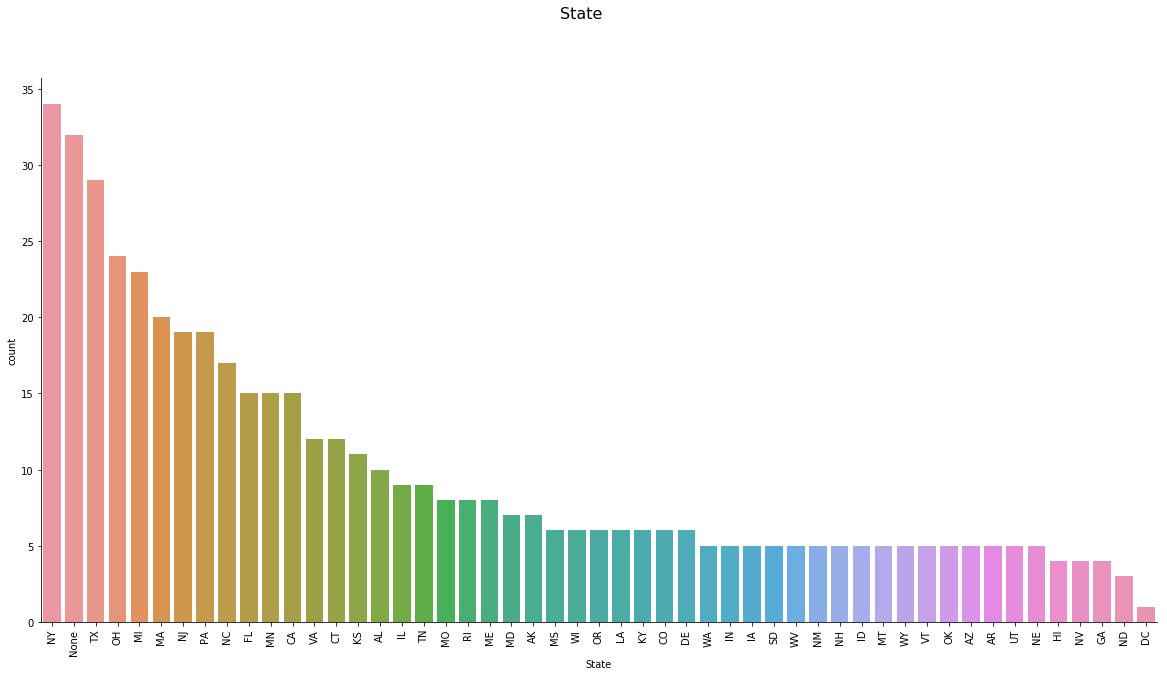

In [22]:

plt.figure(figsize=(20,10))
sns.countplot(x='State', data=events,order = events['State'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('State', fontsize=16)
sns.despine()



# counting zero values
#print((events[['Fiscal Year','Event ID','Security Category Name','Public Event Name','Event Created Date','Event Date','Event Goal($)','Active Registrations','Inactive Registrations','Total Fees Paid','Total of All Confirmed Gifts($)','Total Online Gifts($)','Teams','Captains','Average Team Size','Team pages with custom URL','Emails Sent','Personal pages with custom URL','Total Offline Confirmed Gifts($)','Self Donors','Total From Participant($)','Non-self Donors','Total Not From Participant($)','Total Team Gifts($)','Total Event Gifts($)','Total Offline Unconfirmed Gifts($)','Street Address','City','State','Zip Code','Internal Event Name','Previous Event ID']] == 0).sum())


Text(0.5,0.98,'Total of All Confirmed Gifts($) by Emails Sent')

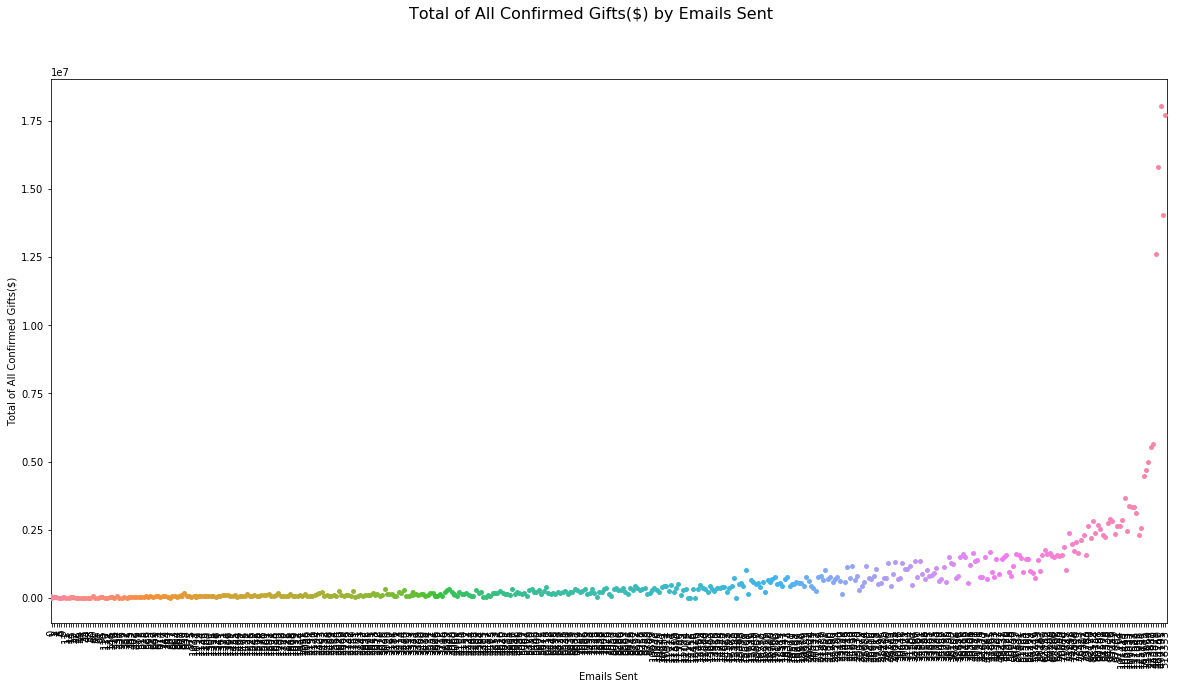

In [63]:
plt.figure(figsize=(20,10))

sns.stripplot(x="Emails Sent", y="Total of All Confirmed Gifts($)",data=events, jitter=True)
plt.xticks(rotation=90)

plt.suptitle('Total of All Confirmed Gifts($) by Emails Sent', fontsize=16)

Text(0.5,0.98,'Total of All Confirmed Gifts($) by Average Team Size')

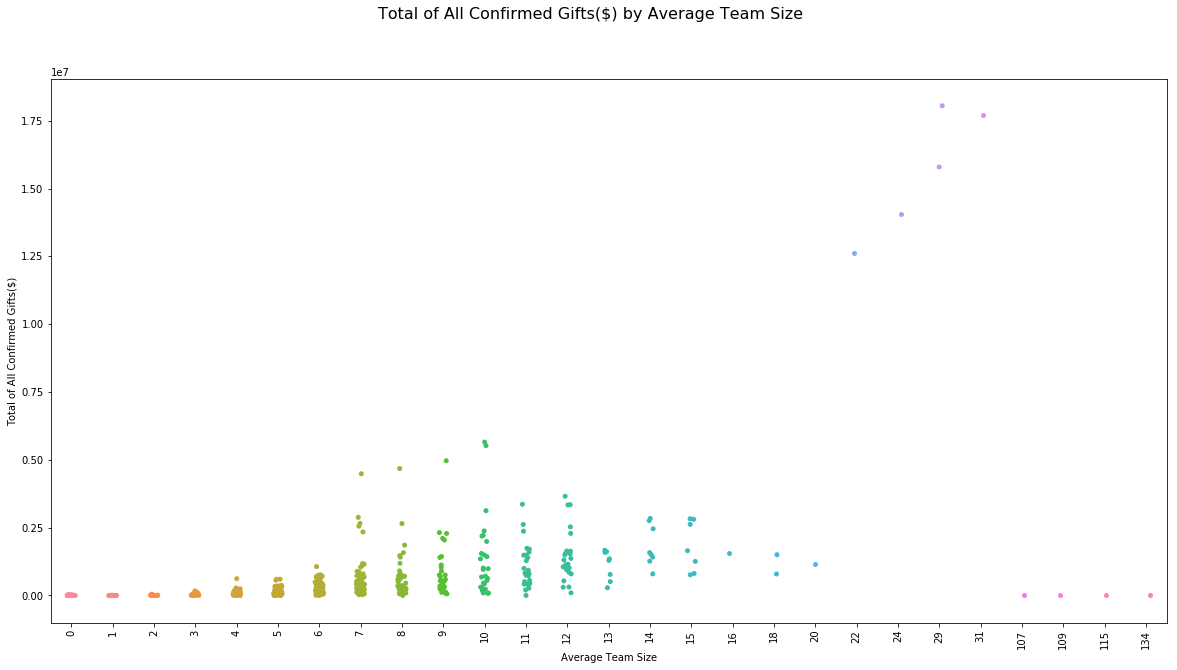

In [23]:
plt.figure(figsize=(20,10))

sns.stripplot(x="Average Team Size", y="Total of All Confirmed Gifts($)",data=events, jitter=True)
plt.xticks(rotation=90)

plt.suptitle('Total of All Confirmed Gifts($) by Average Team Size', fontsize=16)

Text(0.5,0.98,'Total of All Confirmed Gifts($) by State')

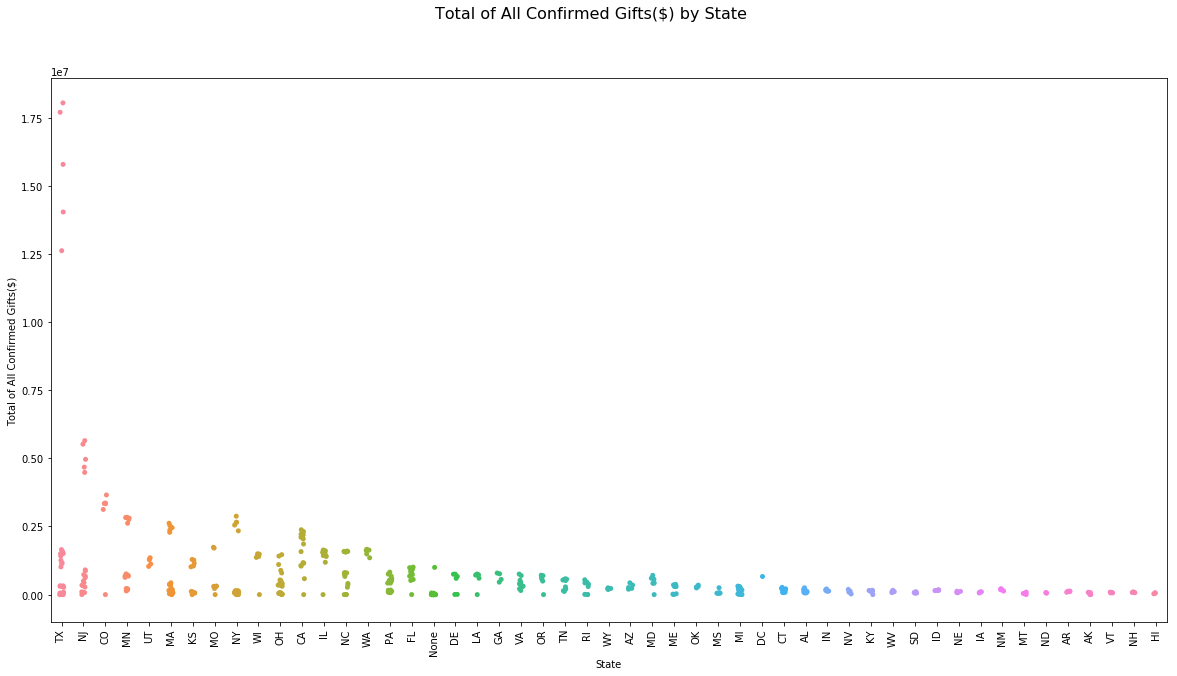

In [24]:
plt.figure(figsize=(20,10))

sns.stripplot(x="State", y="Total of All Confirmed Gifts($)",data=events, jitter=True)
plt.xticks(rotation=90)

plt.suptitle('Total of All Confirmed Gifts($) by State', fontsize=16)

Text(0.5,0.98,'Total of Online Gifts($) by State')

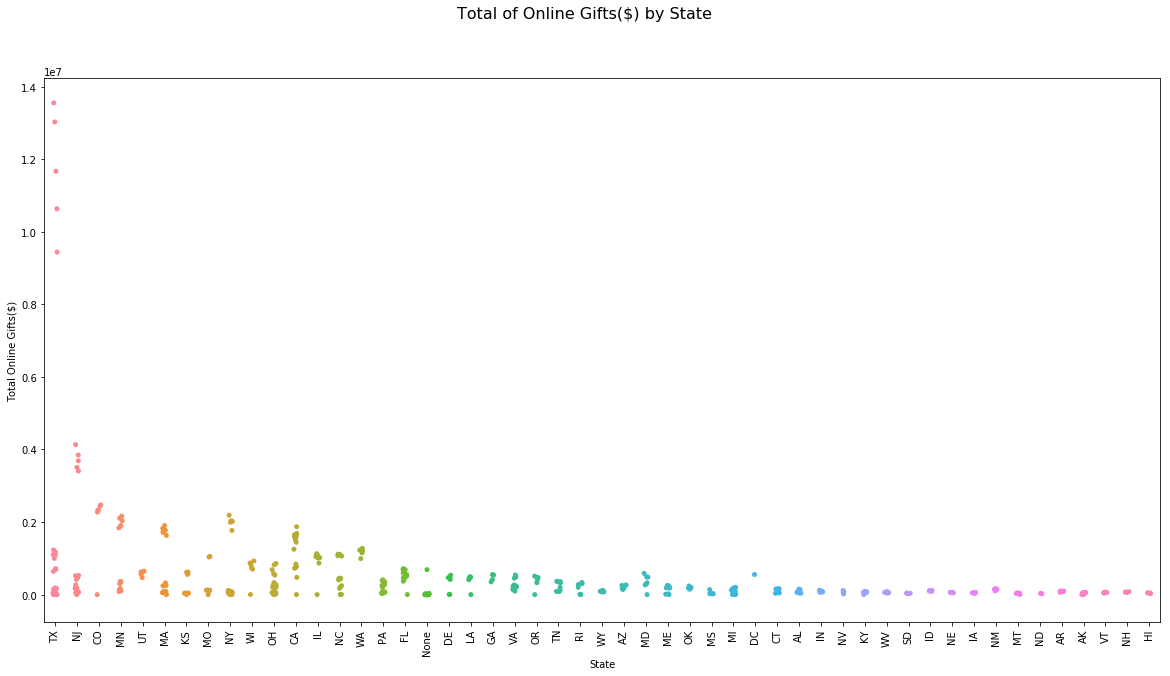

In [25]:
plt.figure(figsize=(20,10))

sns.stripplot(x="State", y="Total Online Gifts($)",data=events, jitter=True)
plt.xticks(rotation=90)

plt.suptitle('Total of Online Gifts($) by State', fontsize=16)

Text(0.5,0.98,'Total Offline Confirmed Gifts($) by State')

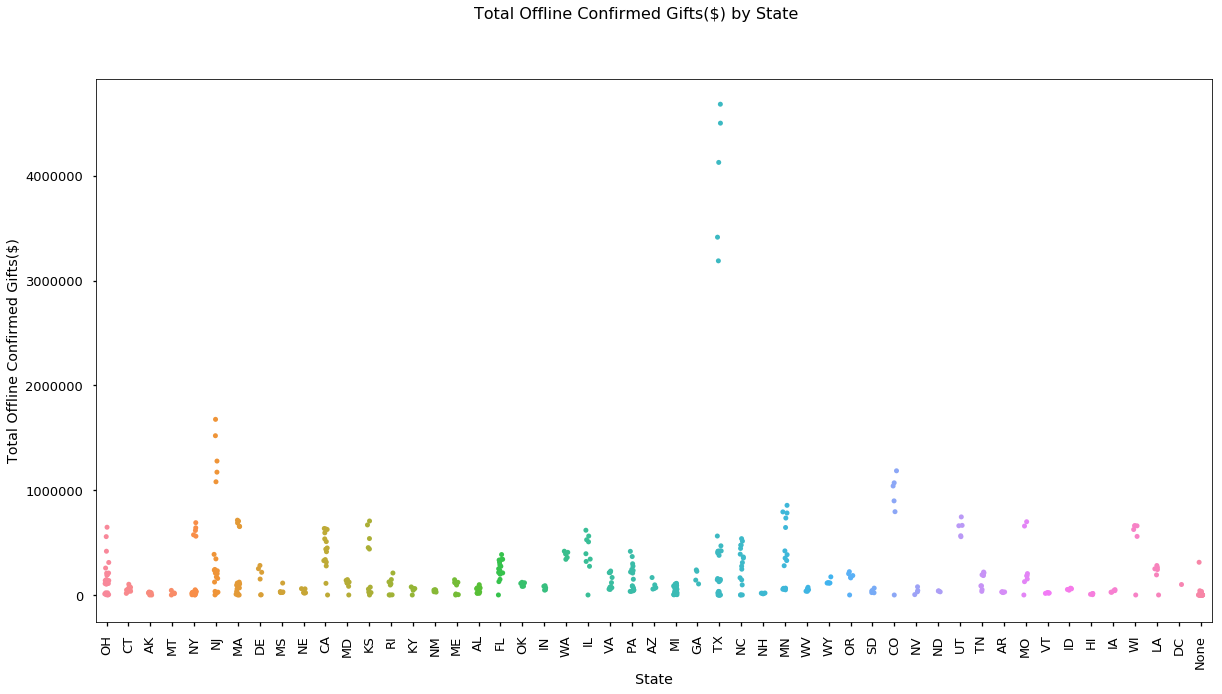

In [32]:
plt.figure(figsize=(20,10))

sns.stripplot(x="State", y="Total Offline Confirmed Gifts($)",data=events, jitter=True)
plt.xticks(rotation=90)

plt.suptitle('Total Offline Confirmed Gifts($) by State', fontsize=16)

Text(0.5,0.98,'Total Event Gifts($)')

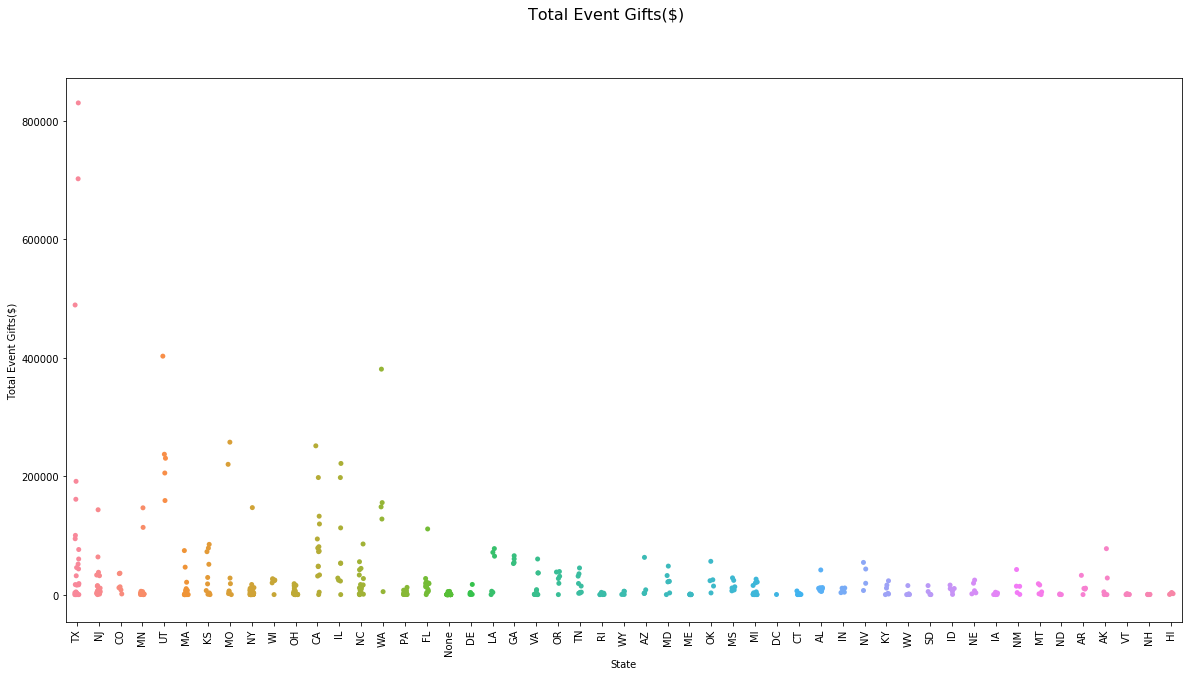

In [44]:
plt.figure(figsize=(20,10))

sns.stripplot(x="State", y="Total Event Gifts($)", data=events, jitter=True, )
plt.xticks(rotation=90)

plt.suptitle('Total Event Gifts($)', fontsize=16)




Text(0.5,0.98,'Total Fees Paid ($)')

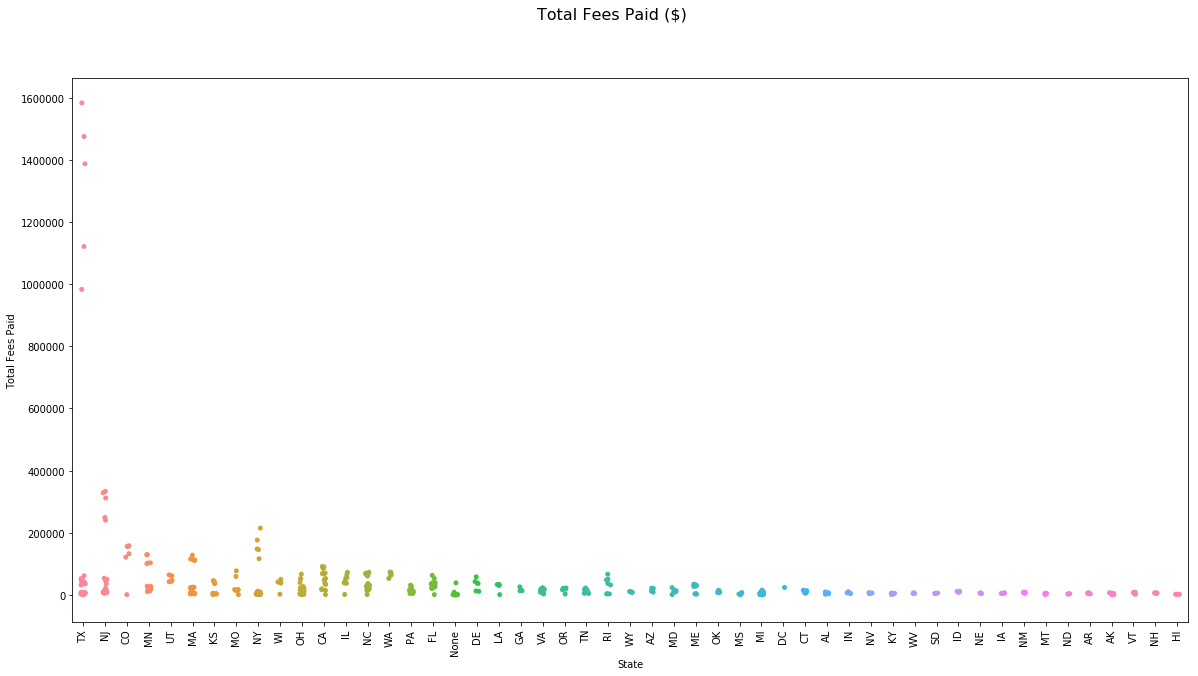

In [49]:
plt.figure(figsize=(20,10))

sns.stripplot(x="State", y="Total Fees Paid", data=events, jitter=True, )
plt.xticks(rotation=90)

plt.suptitle('Total Fees Paid ($)', fontsize=16)

Text(0.5,0.98,'Total Team Gifts($)')

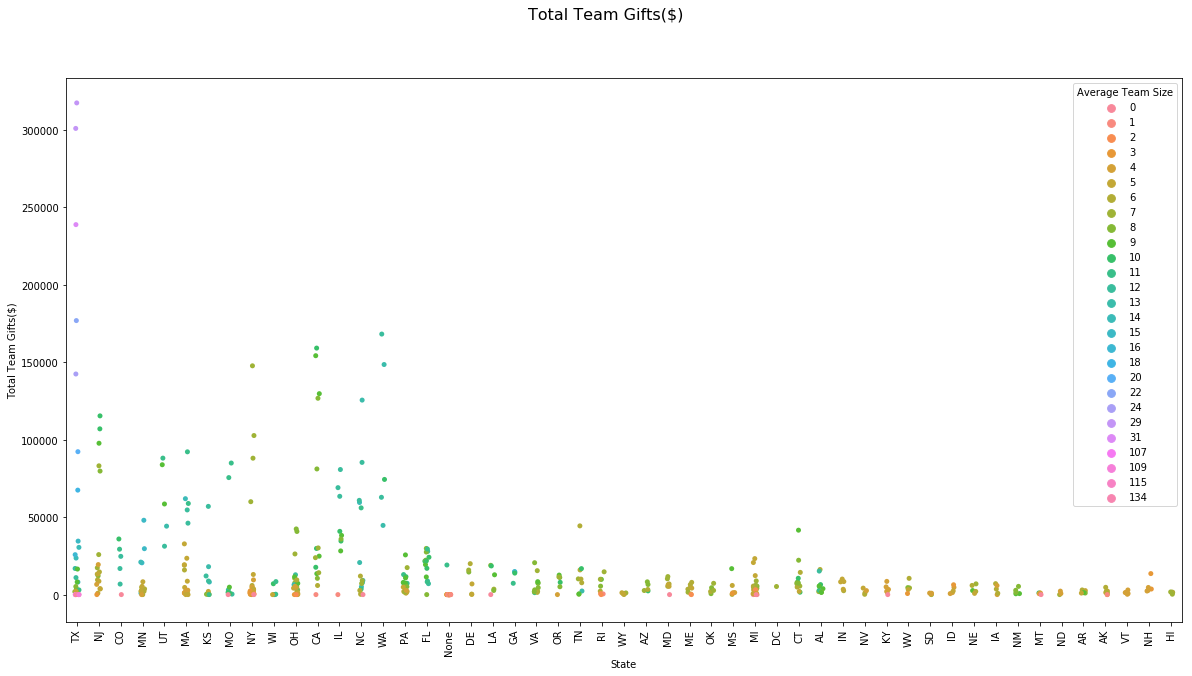

In [31]:
plt.figure(figsize=(20,10))

sns.stripplot(x="State", y="Total Team Gifts($)", hue="Average Team Size", data=events, jitter=True)
plt.xticks(rotation=90)

plt.suptitle('Total Team Gifts($)', fontsize=16)

# Describing Data

In [8]:
dummy = pd.get_dummies(events['State'])
eventsd = pd.concat([events, dummy],axis=1)
eventsd.head()


,Fiscal Year,Event ID,Security Category Name,Public Event Name,Event Created Date,Event Date,Event Goal($),Active Registrations,Inactive Registrations,Total Fees Paid,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,2014,22598,TXH Bike Events,"Texas, Houston - 2014 BP MS 150",2013-08-15 16:01:00,2014-04-12 16:41:00,18500000,14871,1063,1584950.00,...,0,0,1,0,0,0,0,0,0,0
1,2015,25298,TXH Bike Events,2015 BP MS 150,2014-09-26 12:54:00,2015-04-18 17:22:00,20000000,14575,763,1476800.00,...,0,0,1,0,0,0,0,0,0,0
2,2013,20226,TXH Bike Events,2013 BP MS 150,2012-09-19 14:23:00,2013-04-20 12:05:00,18000000,13694,946,1388650.00,...,0,0,1,0,0,0,0,0,0,0
3,2016,27003,TXH Bike Events,2016 BP MS 150,2015-08-31 09:45:00,2016-04-16 13:18:00,20000000,11416,431,1122249.47,...,0,0,1,0,0,0,0,0,0,0
4,2017,28263,TXH Bike Events,2017 BP MS 150,2016-08-24 11:31:00,2017-04-29 16:19:00,16000000,10420,674,983702.50,...,0,0,1,0,0,0,0,0,0,0


In [9]:
eventsd.describe()

,Fiscal Year,Event ID,Event Goal($),Active Registrations,Inactive Registrations,Total Fees Paid,Total of All Confirmed Gifts($),Total Online Gifts($),Teams,Captains,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
count,524.000000,524.000000,5.240000e+02,524.000000,524.000000,5.240000e+02,5.240000e+02,5.240000e+02,524.000000,524.000000,...,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000
mean,2014.811069,24519.307252,8.591983e+05,904.786260,34.221374,3.521103e+04,6.645060e+05,4.584677e+05,66.141221,73.406489,...,0.009542,0.017176,0.055344,0.009542,0.022901,0.009542,0.009542,0.011450,0.009542,0.009542
std,1.407638,3028.272539,1.992613e+06,1670.583736,96.799613,1.334289e+05,1.691521e+06,1.254304e+06,95.743059,109.651093,...,0.097309,0.130049,0.228868,0.097309,0.149730,0.097309,0.097309,0.106494,0.097309,0.097309
min,2013.000000,17966.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,21943.500000,1.150000e+05,162.500000,1.000000,3.139480e+03,5.831193e+04,3.525310e+04,16.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,24822.000000,2.950000e+05,378.500000,5.500000,7.843750e+03,1.841446e+05,1.108932e+05,35.000000,36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,27172.250000,9.361250e+05,1065.000000,21.250000,2.718072e+04,6.819044e+05,4.405002e+05,83.250000,90.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,29175.000000,2.000000e+07,14871.000000,1063.000000,1.584950e+06,1.805160e+07,1.354922e+07,716.000000,781.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# counting 1 values

print((events[['Fiscal Year','Event ID','Security Category Name','Public Event Name','Event Created Date','Event Date','Event Goal($)','Active Registrations','Inactive Registrations','Total Fees Paid','Total of All Confirmed Gifts($)','Total Online Gifts($)','Teams','Captains','Average Team Size','Team pages with custom URL','Emails Sent','Personal pages with custom URL','Total Offline Confirmed Gifts($)','Self Donors','Total From Participant($)','Non-self Donors','Total Not From Participant($)','Total Team Gifts($)','Total Event Gifts($)','Total Offline Unconfirmed Gifts($)','Street Address','City','State','Zip Code','Internal Event Name','Previous Event ID']] == 1).sum())


Fiscal Year                            0
Event ID                               0
Security Category Name                 0
Public Event Name                      0
Event Created Date                     0
Event Date                             0
Event Goal($)                          5
Active Registrations                  18
Inactive Registrations                31
Total Fees Paid                        0
Total of All Confirmed Gifts($)        0
Total Online Gifts($)                  0
Teams                                 29
Captains                              29
Average Team Size                     19
Team pages with custom URL            43
Emails Sent                            2
Personal pages with custom URL        30
Total Offline Confirmed Gifts($)       0
Self Donors                           10
Total From Participant($)              0
Non-self Donors                       23
Total Not From Participant($)          0
Total Team Gifts($)                    0
Total Event Gift

In [10]:
eventsd.corr()


,Fiscal Year,Event ID,Event Goal($),Active Registrations,Inactive Registrations,Total Fees Paid,Total of All Confirmed Gifts($),Total Online Gifts($),Teams,Captains,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Fiscal Year,1.000000,0.961586,0.036677,0.008887,-0.032977,0.001611,0.025034,0.032637,0.050365,0.041874,...,0.013186,0.028205,0.038453,0.013186,-0.033864,0.013186,0.013186,0.027214,0.013186,0.013186
Event ID,0.961586,1.000000,0.001403,-0.040827,-0.070416,-0.021870,-0.012344,-0.003273,-0.015537,-0.023911,...,0.015413,-0.014321,0.034173,-0.000257,-0.039186,0.008821,0.017704,0.011900,0.035470,0.023174
Event Goal($),0.036677,0.001403,1.000000,0.921437,0.816004,0.951572,0.978337,0.978793,0.718436,0.781904,...,-0.036683,-0.027026,0.353863,0.028637,-0.028136,-0.036693,0.045085,0.034644,-0.034124,-0.029001
Active Registrations,0.008887,-0.040827,0.921437,1.000000,0.785212,0.885398,0.942483,0.937703,0.882069,0.922148,...,-0.040343,-0.027204,0.301308,0.052765,-0.037780,-0.045612,0.056093,0.043928,-0.043118,-0.037049
Inactive Registrations,-0.032977,-0.070416,0.816004,0.785212,1.000000,0.830201,0.837838,0.832684,0.586820,0.642482,...,-0.030876,-0.006986,0.283737,-0.003675,-0.034782,-0.029658,0.041185,0.040745,-0.026004,-0.031891
Total Fees Paid,0.001611,-0.021870,0.951572,0.885398,0.830201,1.000000,0.970709,0.973606,0.604741,0.680164,...,-0.022963,-0.022232,0.375244,0.011608,-0.025070,-0.022423,0.021770,-0.000527,-0.022703,-0.019542
Total of All Confirmed Gifts($),0.025034,-0.012344,0.978337,0.942483,0.837838,0.970709,1.000000,0.998486,0.727569,0.793143,...,-0.034335,-0.021544,0.360284,0.032315,-0.023589,-0.034315,0.051486,0.034417,-0.032264,-0.025914
Total Online Gifts($),0.032637,-0.003273,0.978793,0.937703,0.832684,0.973606,0.998486,1.000000,0.720550,0.787259,...,-0.033154,-0.022093,0.361627,0.009723,-0.022481,-0.031648,0.055582,0.018798,-0.031362,-0.028722
Teams,0.050365,-0.015537,0.718436,0.882069,0.586820,0.604741,0.727569,0.720550,1.000000,0.992164,...,-0.039138,-0.017394,0.110809,0.063066,-0.030503,-0.051657,0.069633,0.043723,-0.046321,-0.040575
Captains,0.041874,-0.023911,0.781904,0.922148,0.642482,0.680164,0.793143,0.787259,0.992164,1.000000,...,-0.039967,-0.018056,0.164511,0.060922,-0.032362,-0.051794,0.088339,0.037753,-0.046776,-0.041221


# FIRST PRIORITY: CORPORATE ACQUISITION
  * What are the greatest growth opportunities for new corporate teams?
  * Can we apply those opportunities to specific rides/markets, especially our biggest events?
  * What industries have had the strongest involvement in Bike MS in the last five years?
  * What occupations were responsible for most of our fundraising?
  * Can we tie together these industries and occupations to identify gaps/opportunities?
  * What is the common denominator for our top performing corporate teams? (Is it industry, culture, executive involvement, connection to MS, other?)
  * Can we quantify the effect competing events are having in our top markets? 
Top competitors:
   1. Best Buddies
     * HYANNIS PORT June 2, 2018 Boston to Hyannis Port, MA
     * HEARST CASTLE September 8, 2018 San Simeon, CA
     * MIAMI November 16, 2018 Miami, FL
   2. Peddle the Cause
     * Louis
     * San Diego
   3. Pelatonia – OH
   4. PanMass Challenge - Boston
   5. ADA – Tour de Cure
   6. Jude Children’s Research Hospital
   7. JDRF Ride to Cure Diabetes
   8. Cycle for Life - Cystic Fibrosis Foundation
   9. Ride to Recovery
   10. Virtual Cycling
   11. Athletic Club Stationary Cycling Relays
   12. American Cancer Society
   13. Leukemia and Lymphoma Society – Team in Training

# SECOND PRIORITY: DIGITAL/SOCIAL ACQUISITION
  * What are the greatest opportunities for digital marketing investments? Where have we seen the greatest ROI?
  * Once someone is registered, what tactics and behaviors drive fundraising, and at what times leading up to the event?
  * What behavioral data do you see about usage of our fundraising tools and how it may or may not relate to performance of top fundraisers?
  * Despite increasing our digital advertising spend, acquisition continues to trend downward overall. Why? Is it an issue of needing more traffic, better targeting, or a conversion rate issue that needs to be addressed through the registration process? What can we do to reverse the trend?


# FINALLY:
  * As you studied this data, is there something else that came up as an insight into our operations that the questions above do not capture? 


# Descriptive Analytics